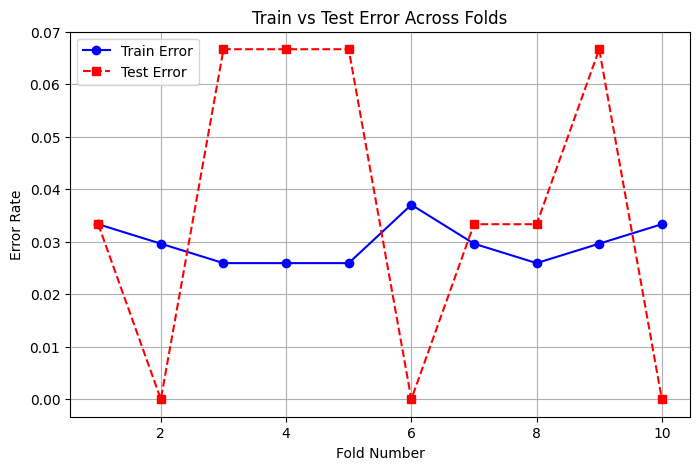

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

features, labels = make_classification(n_samples=300, n_features=6)

num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True)

train_errors = []
test_errors = []

for train_idx, test_idx in kf.split(features):
    X_train, X_test = features[train_idx], features[test_idx]
    y_train, y_test = labels[train_idx], labels[test_idx]

    model = LogisticRegression()
    model.fit(X_train, y_train)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)

    train_errors.append(1 - train_accuracy)
    test_errors.append(1 - test_accuracy)

plt.figure(figsize=(8, 5), facecolor='white')
plt.plot(range(1, num_folds + 1), train_errors, marker='o', linestyle='-', label='Train Error', color='blue')
plt.plot(range(1, num_folds + 1), test_errors, marker='s', linestyle='--', label='Test Error', color='red')

plt.xlabel("Fold Number")
plt.ylabel("Error Rate")
plt.title("Train vs Test Error Across Folds")
plt.legend()
plt.grid(True)
plt.show()
